<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r8_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-1-r8.csv?token=AKVFSOCOQGT3T2W6ORFAWJC63I4NU')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-15-r8.csv?token=AKVFSOAHUEWQYSGZO3H3HJK63I4MI')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [13]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,100,0,1,1,1,4,3,9,15,15,24,8,4,4,4,1.0,20,31,1,31,31,0,16,3,27,0
1,100,0,1,1,1,4,3,9,15,15,24,8,3,4,4,1.0,20,25,1,25,25,0,12,3,27,1
2,122,0,3,1,1,4,3,9,0,0,24,8,4,2,2,1.0,12,24,2,25,48,0,16,3,27,1
3,122,0,3,1,1,4,3,9,1,1,24,8,5,3,3,1.0,16,30,2,31,60,0,20,3,27,0
4,138,2,0,4,1,1,5,17,24,8,15,15,3,4,0,0.0,4,23,3,25,69,0,12,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109901,3276984,2,0,4,1,1,5,20,24,8,15,15,30096,4,0,0.0,4,5,7,11,35,0,120384,20,400,0
109902,3276985,2,0,4,2,2,5,20,24,8,15,15,30096,4,0,0.0,5,4,8,11,32,0,481536,20,400,0
109903,3276986,2,0,4,3,2,5,20,24,8,15,15,30096,4,0,0.0,6,3,9,11,27,0,722304,20,400,0
109904,3276987,2,0,4,4,2,5,20,24,8,15,15,30096,4,0,0.0,7,2,10,11,20,0,963072,20,400,0


In [14]:
df.shape

(109906, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-11-r8.csv?token=AKVFSOC4TLQUBVRJBWFEK6C63I4LO')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-12-r8.csv?token=AKVFSOAKB2AYPBWMBTZQIB263I46G')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-7-r8.csv?token=AKVFSOBOOWHOYC7EACQCDNC63I46I')


In [16]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(67449, 26)
(89920, 26)
(63960, 26)


Processing

In [17]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [19]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.409702,-0.282106,-0.012856,0.019981,0.670115,0.654460,-0.061853,0.557011,-0.095856,-0.540187,-0.428354,-0.143558,0.045970,-0.075862,-0.067975,0.527198,-0.142056,0.324211,0.613203,0.069798
inport,-0.409702,1.000000,0.125653,-0.024432,0.038026,-0.463530,-0.553124,0.025065,0.156366,0.693096,0.864518,0.593501,0.036851,-0.099645,-0.048815,-0.053453,0.383648,0.053978,-0.286835,-0.516277,-0.006335
cache_coherence_type,-0.282106,0.125653,1.000000,0.198391,-0.308511,-0.357467,-0.374463,0.034543,-0.222707,0.060214,0.192063,-0.008672,0.063156,-0.057163,0.004659,0.006379,-0.053179,0.287376,0.592053,-0.043265,0.002016
flit_id,-0.012856,-0.024432,0.198391,1.000000,0.041059,0.195357,0.159340,0.004583,-0.014590,-0.032532,-0.026663,0.304961,-0.037711,0.042638,0.003830,0.002767,-0.021004,0.642814,0.347231,0.259071,-0.002712
flit_type,0.019981,0.038026,-0.308511,0.041059,1.000000,-0.303842,-0.247842,-0.007185,0.022670,0.050622,0.041497,0.327479,-0.040195,0.035451,-0.003688,-0.002888,0.032680,0.173709,-0.540010,-0.402933,0.004241
vnet,0.670115,-0.463530,-0.357467,0.195357,-0.303842,1.000000,0.973470,-0.040054,0.285457,-0.401975,-0.608338,-0.560924,-0.091011,0.095046,0.003136,-0.002307,0.187363,-0.082321,0.541010,0.936767,0.015855
vc,0.654460,-0.553124,-0.374463,0.159340,-0.247842,0.973470,1.000000,-0.035698,0.207617,-0.498819,-0.692510,-0.598935,-0.084260,0.109657,0.019743,0.014417,0.104170,-0.093373,0.502812,0.938343,0.009540
traversal_id,-0.061853,0.025065,0.034543,0.004583,-0.007185,-0.040054,-0.035698,1.000000,-0.024552,0.002484,0.013750,0.029323,0.143040,0.143961,0.223108,0.159584,-0.033941,0.548973,-0.003456,-0.028482,-0.320736
hop_count,0.557011,0.156366,-0.222707,-0.014590,0.022670,0.285457,0.207617,-0.024552,1.000000,0.582413,0.111072,0.125245,-0.106303,-0.035954,-0.110587,-0.104858,0.652142,-0.091407,0.045774,0.179319,0.038998
current_hop,-0.095856,0.693096,0.060214,-0.032532,0.050622,-0.401975,-0.498819,0.002484,0.582413,1.000000,0.784026,0.683768,-0.006614,-0.126152,-0.103209,-0.099032,0.536764,0.018939,-0.292647,-0.477179,0.035775


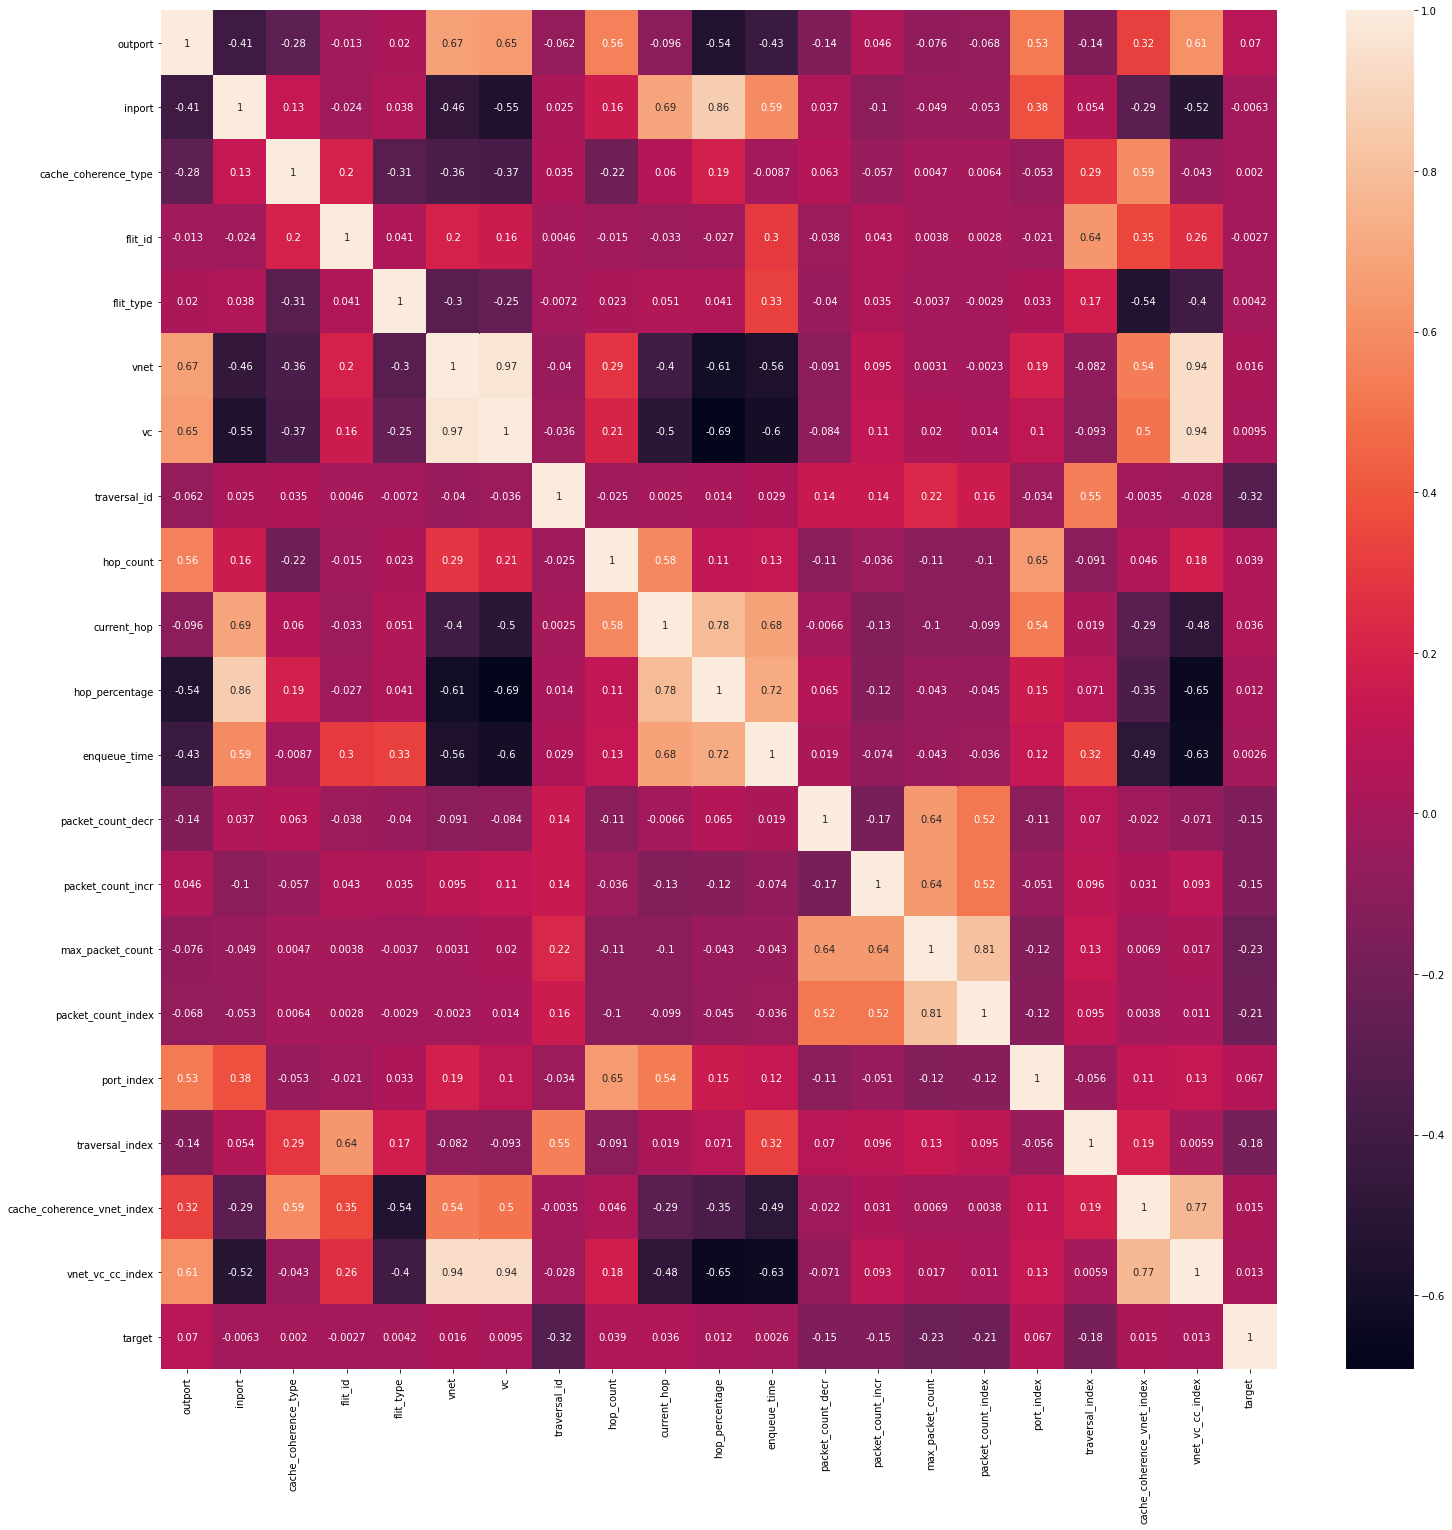

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [22]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

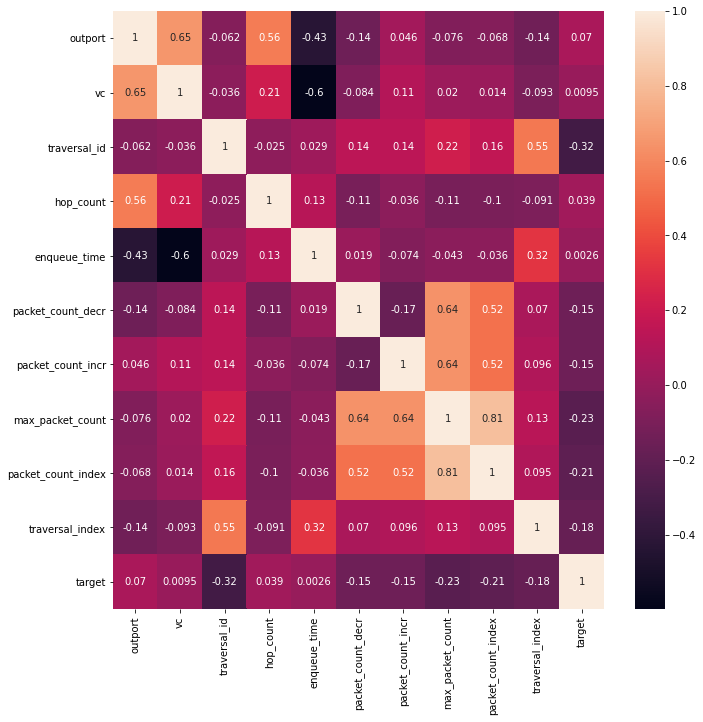

In [24]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

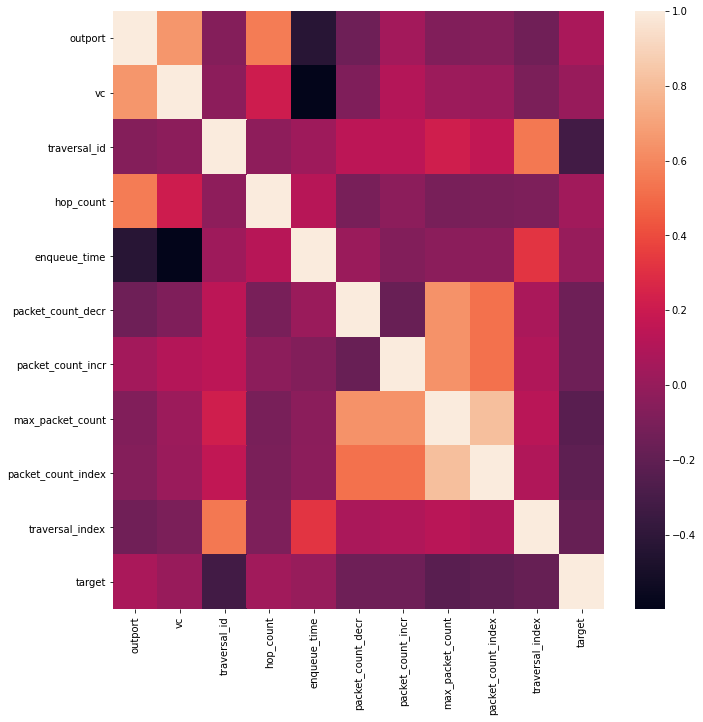

In [25]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [27]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.000000,0.000000,0.000033,0.666667,0.235294,0.197368,0.000000,0.197368,0.005061,0.000001
1,0.000000,0.000000,0.000000,0.666667,0.235294,0.157895,0.000000,0.157895,0.004049,0.000000
2,0.000000,0.000000,0.000033,0.333333,0.117647,0.151316,0.006579,0.157895,0.007928,0.000001
3,0.000000,0.000000,0.000066,0.500000,0.176471,0.190789,0.006579,0.197368,0.009953,0.000003
4,0.666667,0.727273,0.000000,0.666667,0.000000,0.144737,0.013158,0.157895,0.011471,0.000000
...,...,...,...,...,...,...,...,...,...,...
109901,0.666667,1.000000,1.000000,0.666667,0.000000,0.026316,0.039474,0.065789,0.005735,0.044442
109902,0.666667,1.000000,1.000000,0.666667,0.014706,0.019737,0.046053,0.065789,0.005229,0.177780
109903,0.666667,1.000000,1.000000,0.666667,0.029412,0.013158,0.052632,0.065789,0.004386,0.266672
109904,0.666667,1.000000,1.000000,0.666667,0.044118,0.006579,0.059211,0.065789,0.003205,0.355565


In [28]:
train_X[train_X.duplicated()].shape

(0, 10)

In [29]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.000000,0.000000,0.000000,0.500000,0.176471,0.260274,0.000000,0.260274,0.006941,0.000000
1,0.000000,0.000000,0.000033,0.666667,0.235294,0.253425,0.006849,0.260274,0.013699,0.000001
2,0.666667,0.727273,0.000000,0.500000,0.000000,0.246575,0.013699,0.260274,0.020091,0.000000
3,0.666667,0.727273,0.000000,0.500000,0.014706,0.239726,0.020548,0.260274,0.026119,0.000018
4,0.666667,0.727273,0.000000,0.500000,0.029412,0.232877,0.027397,0.260274,0.031781,0.000030
...,...,...,...,...,...,...,...,...,...,...
67444,0.666667,0.909091,0.999568,0.666667,0.029412,0.020548,0.054795,0.075342,0.006393,0.266671
67445,0.666667,0.909091,0.999568,0.666667,0.044118,0.013699,0.061644,0.075342,0.005297,0.355564
67446,0.666667,0.090909,0.999568,0.500000,0.058824,0.006849,0.068493,0.075342,0.003836,0.133333
67447,0.666667,0.909091,0.999568,0.666667,0.102941,0.000000,0.075342,0.075342,0.002009,0.666687


In [30]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [31]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [33]:
train_Y = df['target']
train_Y.value_counts()

0    63971
1    45935
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1282.771493
8  packet_count_index   450.792496
9     traversal_index   431.628421
7    max_packet_count   411.442175
5   packet_count_decr   213.058648
6   packet_count_incr   198.512285
0             outport   145.274964
3           hop_count    17.882455
1                  vc     4.688915
4        enqueue_time     0.133340


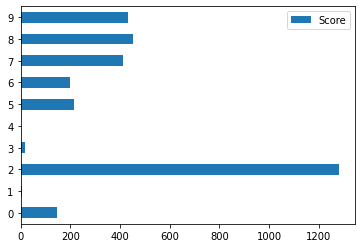

In [36]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [41]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.16039491016744
Test Prediction Score 95.44514599244533


In [42]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.45340924253881
Test Prediction Score 83.66214412811388
Test Prediction Score 80.47842401500938


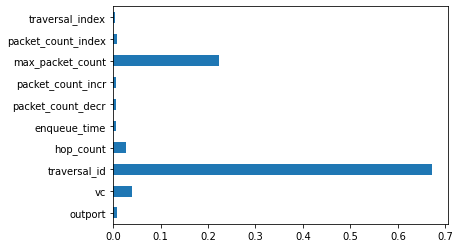

In [43]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

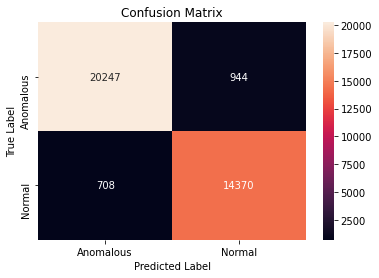

In [44]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     21191
           1       0.94      0.95      0.95     15078

    accuracy                           0.95     36269
   macro avg       0.95      0.95      0.95     36269
weighted avg       0.95      0.95      0.95     36269



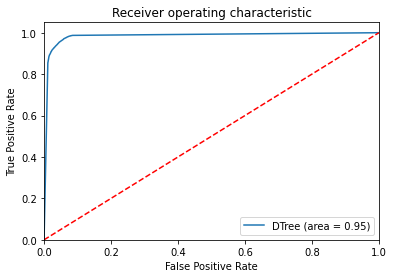

In [46]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [48]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r8l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [51]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.7132537428658


In [52]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.03313614731131
Test Prediction Score 84.5329181494662
Test Prediction Score 82.25453408380238


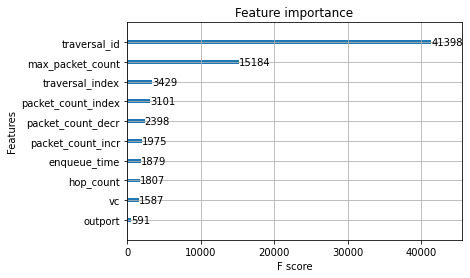

In [53]:
plot_importance(xgbc)
plt.show()

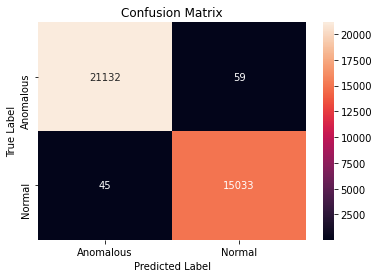

In [54]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21191
           1       1.00      1.00      1.00     15078

    accuracy                           1.00     36269
   macro avg       1.00      1.00      1.00     36269
weighted avg       1.00      1.00      1.00     36269



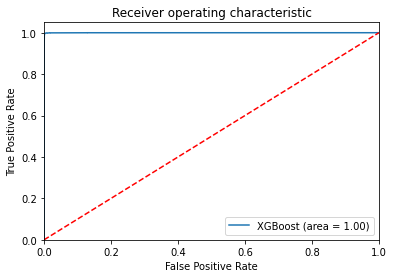

In [56]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()